In [5]:

import csv
import json
import numpy as np
import os
import sys
from matplotlib import pyplot as plt
from scipy import linalg as scipy_linalg

In [6]:
_BASE_DIR = (
    '/Users/nicholaswatters/Desktop/grad_school/research/mehrdad/'
    'multi_prediction/phys/data_processed/Elgar/2022-09-19'
)
_SYNC_DIR = os.path.join(_BASE_DIR, 'sync_pulses')
_TRIAL_STRUCTURE_DIR = os.path.join(_BASE_DIR, 'trial_structure')
_SPIKE_SORTING_DIR = os.path.join(_BASE_DIR, 'spike_sorting')



In [10]:
trial_ind = 1000
print(trials[trial_ind].keys())
print(trials[trial_ind]['mworks_trial_num'])
print(trials[trial_ind]['mworks_session_num'])
print(trials[trial_ind]['mworks_t_start'])

dict_keys(['mworks_trial_num', 'mworks_t_start', 'mworks_t_end', 'mworks_relative_phase_times', 'mworks_photodiode_delay', 'mworks_session_num', 'moog_data', 'open_ephys_t_start', 'open_ephys_t_end', 'open_ephys_relative_phase_times', 'open_ephys_photodiode_delay', 'spikeglx_t_start', 'spikeglx_t_end', 'spikeglx_relative_phase_times', 'spikeglx_photodiode_delay'])
856
1
3678.795884


In [ ]:
eye_h_calibrated = json.load(open(os.path.join(_TRIAL_STRUCTURE_DIR, 'trials'), 'r'))

In [54]:
print(oe_trials[421:520])

[True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True]


In [70]:
mworks_to_open_ephys_time_ratio = (
    (to_plot[418, 0] - to_plot[2, 0]) / (to_plot[418, 1] - to_plot[2, 1])
)
print(mworks_to_open_ephys_time_ratio)

0.9999661866200498


In [71]:
oe_start_bad_time = trials[421]['open_ephys_t_end']
oe_end_bad_time = trials[519]['open_ephys_t_start']
mw_start_bad_time = trials[421]['mworks_t_end']
mw_end_bad_time = trials[519]['mworks_t_start']


In [73]:
print(oe_start_bad_time)
print(oe_end_bad_time)
print(mw_start_bad_time)
print(mw_end_bad_time)
mw_interval = mw_end_bad_time - mw_start_bad_time
oe_true_interval = mw_interval / mworks_to_open_ephys_time_ratio
oe_empirical_interval = oe_end_bad_time - oe_start_bad_time
print(mw_interval)
print(oe_true_interval)
print(oe_empirical_interval)
oe_after_boost = oe_true_interval - oe_empirical_interval
print(oe_after_boost)

1849.7108999999966
1963.1731384071338
1789.66614
2184.185436
394.51929600000017
394.5326364819403
113.46223840713719
281.0703980748031


In [76]:
spike_times = np.squeeze(np.load(os.path.join(_TRIAL_STRUCTURE_DIR, 'spike_times.npy')))
spike_clusters = np.load(os.path.join(_TRIAL_STRUCTURE_DIR, 'spike_clusters.npy'))
amplitudes = np.squeeze(np.load(os.path.join(_TRIAL_STRUCTURE_DIR, 'amplitudes.npy')))
sample_rate = json.load(open(os.path.join(_TRIAL_STRUCTURE_DIR, 'sample_rate'), 'r'))

In [78]:
adj_spike_times = spike_times / sample_rate
before_inds = adj_spike_times < oe_start_bad_time
after_inds = adj_spike_times > oe_end_bad_time
new_spike_times = np.concatenate(
    [spike_times[before_inds], oe_after_boost + spike_times[after_inds]]
)
new_spike_clusters = np.concatenate(
    [spike_clusters[before_inds], spike_clusters[after_inds]]
)
new_amplitudes = np.concatenate(
    [spike_clusters[before_inds], spike_clusters[after_inds]]
)

In [83]:
for t in trials[500:]:
    if 'open_ephys_t_start' in t:
        t['open_ephys_t_start'] = t['open_ephys_t_start'] + oe_after_boost
    if 'open_ephys_t_end' in t:
        t['open_ephys_t_end'] = t['open_ephys_t_end'] + oe_after_boost

In [84]:
## Save stuff

json.dump(trials, open(os.path.join(_TRIAL_STRUCTURE_DIR, 'trials'), 'w'))
np.save(os.path.join(_TRIAL_STRUCTURE_DIR, 'spike_times.npy'), new_spike_times[:, np.newaxis])
np.save(os.path.join(_TRIAL_STRUCTURE_DIR, 'amplitudes.npy'), new_amplitudes[:, np.newaxis])
np.save(os.path.join(_TRIAL_STRUCTURE_DIR, 'spike_clusters.npy'), new_spike_clusters)


(array([738119., 769238., 662166., 828658., 829548., 849512., 850624.,
        887796., 853199., 743546.]),
 array([8.40000000e+01, 2.04506115e+07, 4.09011390e+07, 6.13516665e+07,
        8.18021940e+07, 1.02252722e+08, 1.22703249e+08, 1.43153777e+08,
        1.63604304e+08, 1.84054832e+08, 2.04505359e+08]),
 <BarContainer object of 10 artists>)

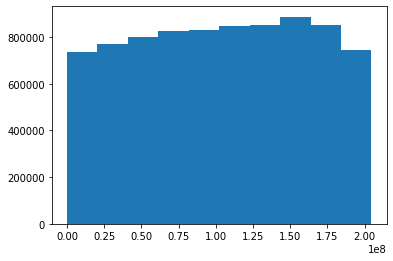

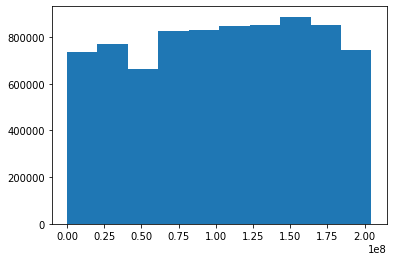

In [79]:
plt.figure()
plt.hist(spike_times)
plt.figure()
plt.hist(new_spike_times)

Text(0.5, 1.0, 'Mworks times vs open_ephys times')

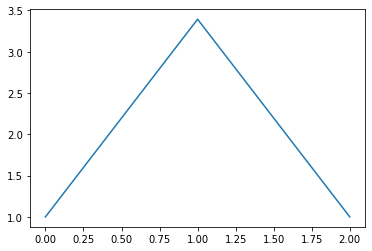

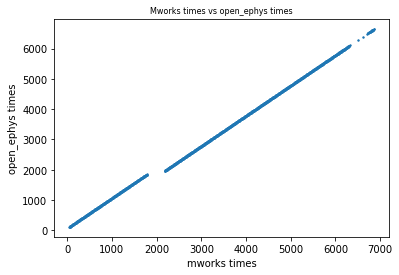

In [45]:


fig, ax = plt.subplots()
# end_ind = -10
ax.plot(diffs_ratio[420:423])

fig, ax = plt.subplots()
ax.scatter(to_plot[:, 0], to_plot[:, 1], s=2)
ax.set_xlabel('mworks times')
ax.set_ylabel('open_ephys times')
ax.set_title('Mworks times vs open_ephys times', fontsize=8)

In [3]:


eye_dir = (
    '/Users/nicholaswatters/Desktop/grad_school/research/mehrdad/'
    'multi_prediction/phys/phys_data/sync_plots/data/Elgar/2022-05-07/eye_data'
)

for session_num in np.arange(8):
    print(session_num)
    eye_data_dir = os.path.join(
        eye_dir, 'mwork_session_num_' + str(session_num))
    times = np.load(os.path.join(eye_data_dir, 'eye_v_calibrated_times.npy'))
    print(times[:5])
    print(times[-5:])

0
[48.854674 48.85701  48.938572 50.942448 50.942535]
[104.963514 104.964448 104.965448 104.966446 105.484695]
1
[122.818818 122.820825 122.902591 124.134667 124.134787]
[3200.944646 3200.945649 3200.94665  3200.947657 3201.465694]
2
[3211.329859 3211.332119 3211.413653 3212.817444 3212.817532]
[4491.103447 4491.10445  4491.106449 4491.106563 4491.624693]
3
[4502.014993 4502.017002 4502.098808 4503.602647 4503.602711]
[5122.918646 5123.051657 5123.052645 5123.053648 5123.054647]
4
[5132.667196 5132.669193 5132.750996 5134.077448 5134.077553]
[5897.748452 5897.749449 5897.75045  5897.751454 5898.269693]
5
[5909.093314 5909.095886 5909.177195 5910.550245 5910.55032 ]
[6713.245246 6713.246257 6713.247255 6713.248255 6713.766696]
6
[6719.305022 6719.307337 6719.388794 6720.693448 6720.693541]
[8912.386448 8912.387449 8912.388448 8912.389447 8912.390456]
7
[8921.499692 8921.501815 8921.583384 8922.874247 8922.874299]
[9458.229251 9458.229323 9458.231246 9458.231297 9458.749692]
